# GRIP:-  Graduate Rotational Internship Program
  **The Sparks Foundation**

Author:- **Avnish V. Shukla**

**Task No.1**:- Percentage prediction on the basis of the no. of study hours.

Using the steps of **CRISP DM Model** i.e. Cross-industry process for data mining, the problem can be solved using the simple Linear Regression.

The steps are as follows:-



1.   Exploratory Data Analysis
2.   Data Preperation
3.   ML Model/Alogrithm
4.   Evaluation of Model

#  **1.** **EXPLORATORY DATA ANALYSIS**
**This step includes the importing the CSV file suing pandas for getting the shape, information such as mean, median and percentiles of the data and plotting the graph using matplotlib and seaborn.**

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)        #csv file imported 

df.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [51]:
df.shape    #shape containing (rows,columns)

(25, 2)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [53]:
df.describe()   #function to describe the count, mean and percentiles
              # importantly the median of the dataset

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [54]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

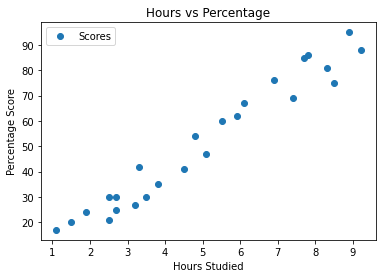

In [64]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

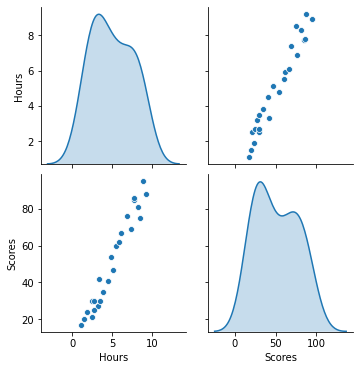

In [65]:
sns.pairplot(df, diag_kind='kde')  #scatter representation of Hours and scores
                                   #using a pairplot

# **2.** **DATA PREPERATION**
**This step includes the dividing of data into Attributes and Labels and splitting of the data into two parts i.e. the training and testing.**

In [56]:
X = df.iloc[:, :-1].values  #X(Attribute) containing Hours starting with index '0'
y = df.iloc[:, 1].values    #y(Lables) containing Scores starting with indes '1'

In [77]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# **3. ML MODEL/ALGORITHM**
**In this step the algorithm is trained and the predictions are made.**

In [78]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)    #the Linear Regression Model is trained

LinearRegression()

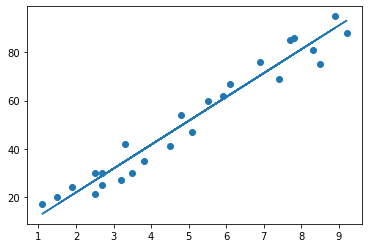

In [46]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_   #here the formula for equation of the line is used i.e. y= mx + c
                                                #where  y = line
                                                #       m = regressor.coef_      c = regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

In [66]:
print(X_test)
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


**Making Predictions**

In [83]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df2 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Prediction of score if the student studies for 9.5 hours a day**

In [79]:
hours = 9.25
hr1 = np.array([hours])
hr1 = hr1.reshape(-1, 1)
own_pred = regressor.predict(hr1)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


**Predicting the score which is defined by the user** 

In [93]:
hour=float(input("Enter the no of hours"))
hr1 = np.array([hour])
hr1 = hr1.reshape(-1, 1)
own_pred = regressor.predict(hr1)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Enter the no of hours4.5
No of Hours = 9.25
Predicted Score = 46.616114204324745


# Use of Stastical(Median) Method for Prediction
**Consider the data points of Hours and Score. Find the Median of the data points present in hours and scores
  here Median of Hours = 4.8
       Median of Scores = 48
  Using the Comperative formula:-**
  
  **Prediction = Hours(Defined by user) * Median of Scores / Median of Hours**
  
  
  
 ***median method can only be used when the data points are not complex***

In [103]:
hour = float(input("Enter the Hours"))
prediction = hours * 48 / 4.8
print("Predicted Score is: ", prediction)

Enter the Hours9.25
Predicted Score is:  92.5


# EVALUATION OF THE MODEL/ALGORITHM
**In this step the model is evaluated by calculating the Mean Absolute Error, Mean Squared Error and Root Mean Squared Error to check the performance of the Algorithm.**

In [87]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
      

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


# Conclusion
**Tasks achieved in the project:-**

        1.Performed Exploratory Data Analysis on the dataset.
        
        2.Prepared the data and applying the simple Linear Regression Algorithm.
        
        3.Predicted the scores based on the Study Hours.
        
        4.Predicted the score using the stastical Median Method
        
        5.Evaluated the Algorithm.